# Primeira etapa: Limpeza e Exploração dos dados

A limpeza e exploração dos dados se faz muito importante pois é a partir dela que compreendemos os dados presentes no dataframe e podemos elencar os primeiros modelos preditivos para realizar a etapa de testes.

### Transformando dados NaN em zero para melhor leitura dos **modelos**

Importando as bibliotecas necessárias:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


Importando a planilha de treino:

In [ ]:
df_train = pd.read_csv("train.csv")

Saving train.csv to train (2).csv


Importando a planilha de teste:

In [332]:
df_test = pd.read_csv("test.csv")


Saving test.csv to test (1).csv


Separando target (coluna alvo) para a realização da limpeza dos dados:

In [ ]:
X_train = train_clean.drop(columns=["labels"])
y_train = train_clean["labels"]

# Preparando X_test a partir de uma cópia do df_test original
X_test = df_test.copy()

Removendo a coluna id do dataframe de teste por não ser um alvo.

In [ ]:
if 'id' in X_test.columns:
    original_test_ids = X_test['id'].copy()
    X_test = X_test.drop(columns=['id'])
else:
    if 'original_test_ids' not in locals():
         print("Warning: 'id' column not found in df_test and original_test_ids not available.")
         original_test_ids = None


Verificando o tamanho de cada dataframe criado.

In [389]:
print("Tamanho do X_train:", X_train.shape)
print("Tamanho do y_train:", y_train.shape)
print("Tamanho do X_test:", X_test.shape)
if original_test_ids is not None:
    print("Número de ids originais do teste salvos:", original_test_ids.shape[0])

Tamanho do X_train: (646, 11)
Tamanho do y_train: (646,)
Tamanho do X_test: (277, 11)
Número de ids originais do teste salvos: 277


Salvando a coluna id do conjunto de treino no conjunto de teste e removendo a coluna de id do conjunto de teste:


In [ ]:
original_test_ids = df_test['id'].copy()
X_test = df_test.copy()

In [ ]:
if 'id' in X_test.columns:
    X_test = X_test.drop(columns=['id'])

Visualizando o tamanho dos dataframes utilizados para treino e para teste:

In [331]:
print("Tamanho do X_train:", X_train.shape)
print("Tamanho do y_train:", y_train.shape)
print("Tamanho do X_test:", X_test.shape)
print("Número de IDs originais do teste salvos:", original_test_ids.shape[0])

Tamanho do X_train: (646, 11)
Tamanho do y_train: (646,)
Tamanho do X_test: (277, 11)
Número de IDs originais do teste salvos: 277


Verificando as colunas presentes no dataframe de treino:

In [ ]:
print(df_train.columns)

Index(['id', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'labels', 'category_code_analytics',
       'category_code_automotive', 'category_code_biotech',
       'category_code_cleantech', 'category_code_consulting',
       'category_code_ecommerce', 'category_code_education',
       'category_code_enterprise', 'category_code_fashion',
       'category_code_finance', 'category_code_games_video',
       'category_code_hardware', 'category_code_health',
       'category_code_manufacturing', 'category_code_me

Preenchendo valores NaN presentes nas colunas de valores numéricos do dataframe de treino e teste com a mediana de cada coluna:

In [ ]:
numerical_cols_train = df_train.select_dtypes(include=["int64","float64"]).columns
numerical_cols_test = df_test.select_dtypes(include=["int64","float64"]).columns

In [ ]:
common_numerical_cols = list(set(numerical_cols_train) & set(numerical_cols_test))

for col in common_numerical_cols:
    mediana = df_train[col].median()
    df_train[col] = df_train[col].fillna(mediana)
    df_test[col] = df_test[col].fillna(mediana)

In [ ]:
if 'labels' in df_train.columns and df_train['labels'].dtype in ["int64","float64"]:
     mediana_labels = df_train['labels'].median()
     df_train['labels'] = df_train['labels'].fillna(mediana_labels)

Realizando a binarização das colunas categóricas do dataframe de treino e teste, além de verificar e garantir que ambos os dataframes possuam as mesmas colunas:

In [330]:
df_train = pd.get_dummies(df_train, drop_first=True, dtype=int)
df_test = pd.get_dummies(df_test, drop_first=True, dtype=int)

Garantindo que o dataframe de treino e de teste possuem as mesmas colunas antes de reunir o dataframe de treino com a coluna alvo:

In [329]:
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

Reunir novamente o conjunto de treino com o target (labels) e verificando se esta coluna está presente no dataframe train_clean:

In [328]:
train_clean = df_train.copy()
if 'labels' not in train_clean.columns and 'labels' in y:
    train_clean["labels"] = y
elif 'labels' in train_clean.columns and train_clean['labels'].dtype == 'object':
     try:
         train_clean["labels"] = train_clean["labels"].astype(int)
     except ValueError:
         print("Could not convert 'labels' to integer type. Check its values.")

Partindo para a exploração dos dados, podemos começar analisando por meio de dimensão, tipo de cada coluna, observar as primeiras linhas de cada coluna e logo depois, verificar a distribuição da variável alvo (labels).

In [327]:
print(train_clean.shape)
print(train_clean.dtypes)
print(train_clean.head())
print(train_clean["labels"].value_counts(normalize=True))

(646, 65)
id                                int64
age_first_funding_year          float64
age_last_funding_year           float64
age_first_milestone_year        float64
age_last_milestone_year         float64
                                 ...   
category_code_software             bool
category_code_sports               bool
category_code_transportation       bool
category_code_travel               bool
category_code_web                  bool
Length: 65, dtype: object
    id  age_first_funding_year  age_last_funding_year  \
0  719                   10.42                  13.09   
1  429                    3.79                   3.79   
2  178                    0.71                   2.28   
3  197                    3.00                   5.00   
4  444                    0.66                   5.88   

   age_first_milestone_year  age_last_milestone_year  relationships  \
0                     8.980                    12.72              4   
1                     2.785            

Observando dados estatísticos de cada coluna - soma, média, desvio padrão, mínimo, etc.

In [ ]:
print(train_clean.describe())

               id  age_first_funding_year  age_last_funding_year  \
count  646.000000              646.000000             646.000000   
mean   461.577399                2.304241               4.031765   
std    264.859464                2.405482               2.930692   
min      1.000000                0.000000               0.000000   
25%    233.250000                0.702500               1.880000   
50%    459.500000                1.650000               3.610000   
75%    692.500000                3.390000               5.560000   
max    923.000000               21.900000              21.900000   

       age_first_milestone_year  age_last_milestone_year  relationships  \
count                646.000000               646.000000     646.000000   
mean                   3.231393                 4.888932       7.948916   
std                    2.552461                 2.926349       7.397602   
min                    0.000000                 0.000000       0.000000   
25%         

Observando a distribuição das variáveis de treino por meio de histogramas:

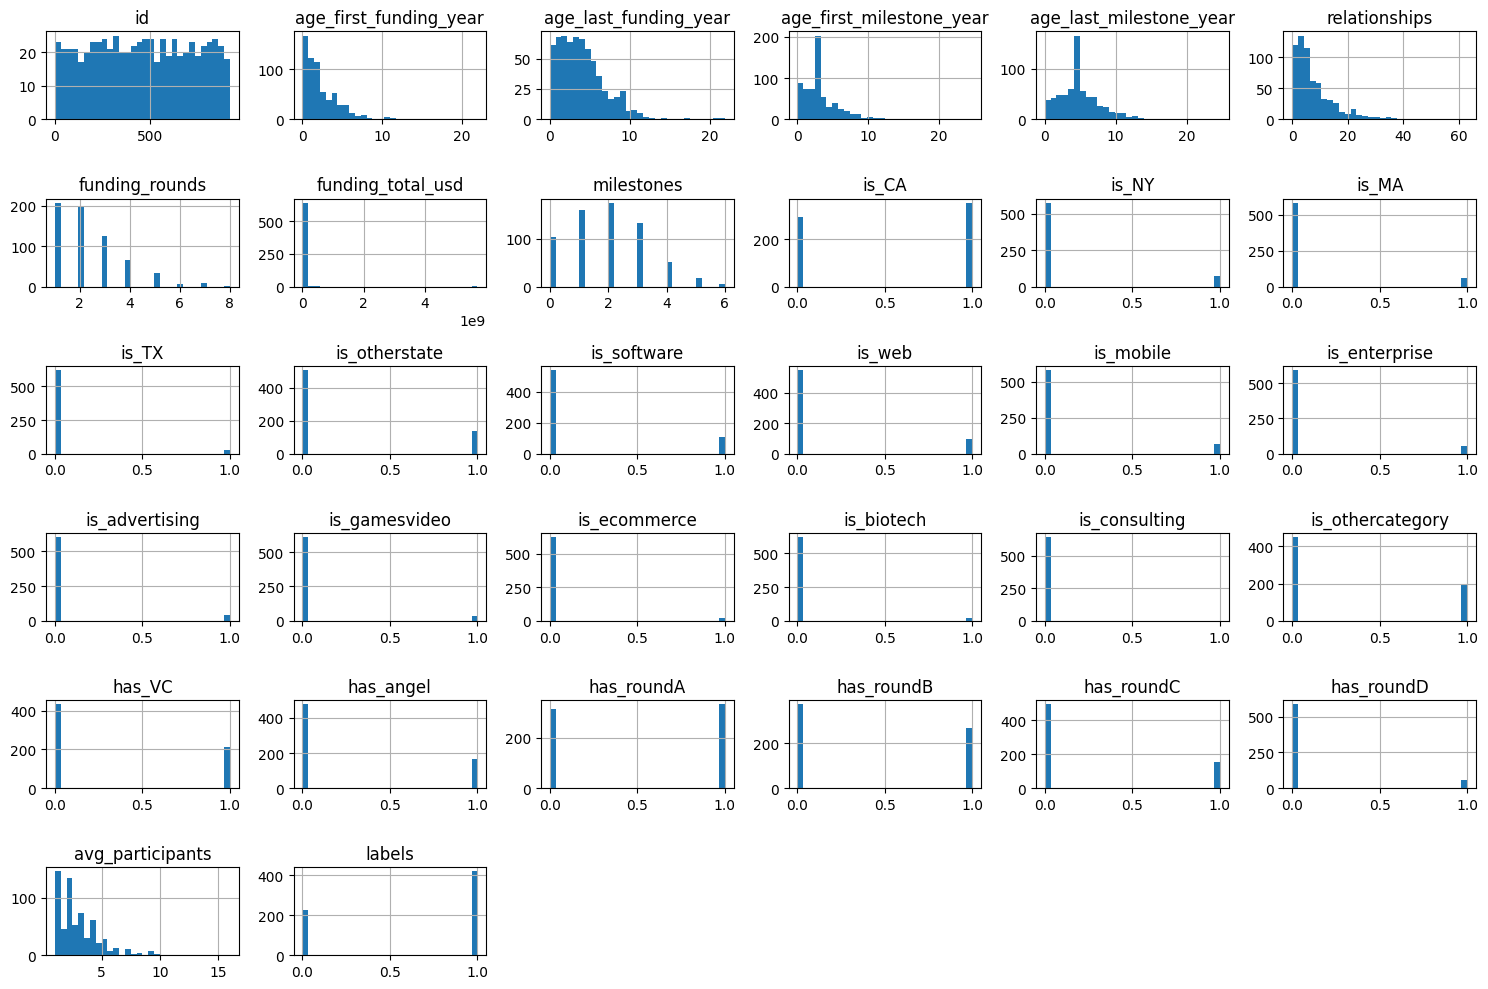

In [ ]:
train_clean.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

Analisando a correlação entre as variáveis por meio da matriz de correlação:

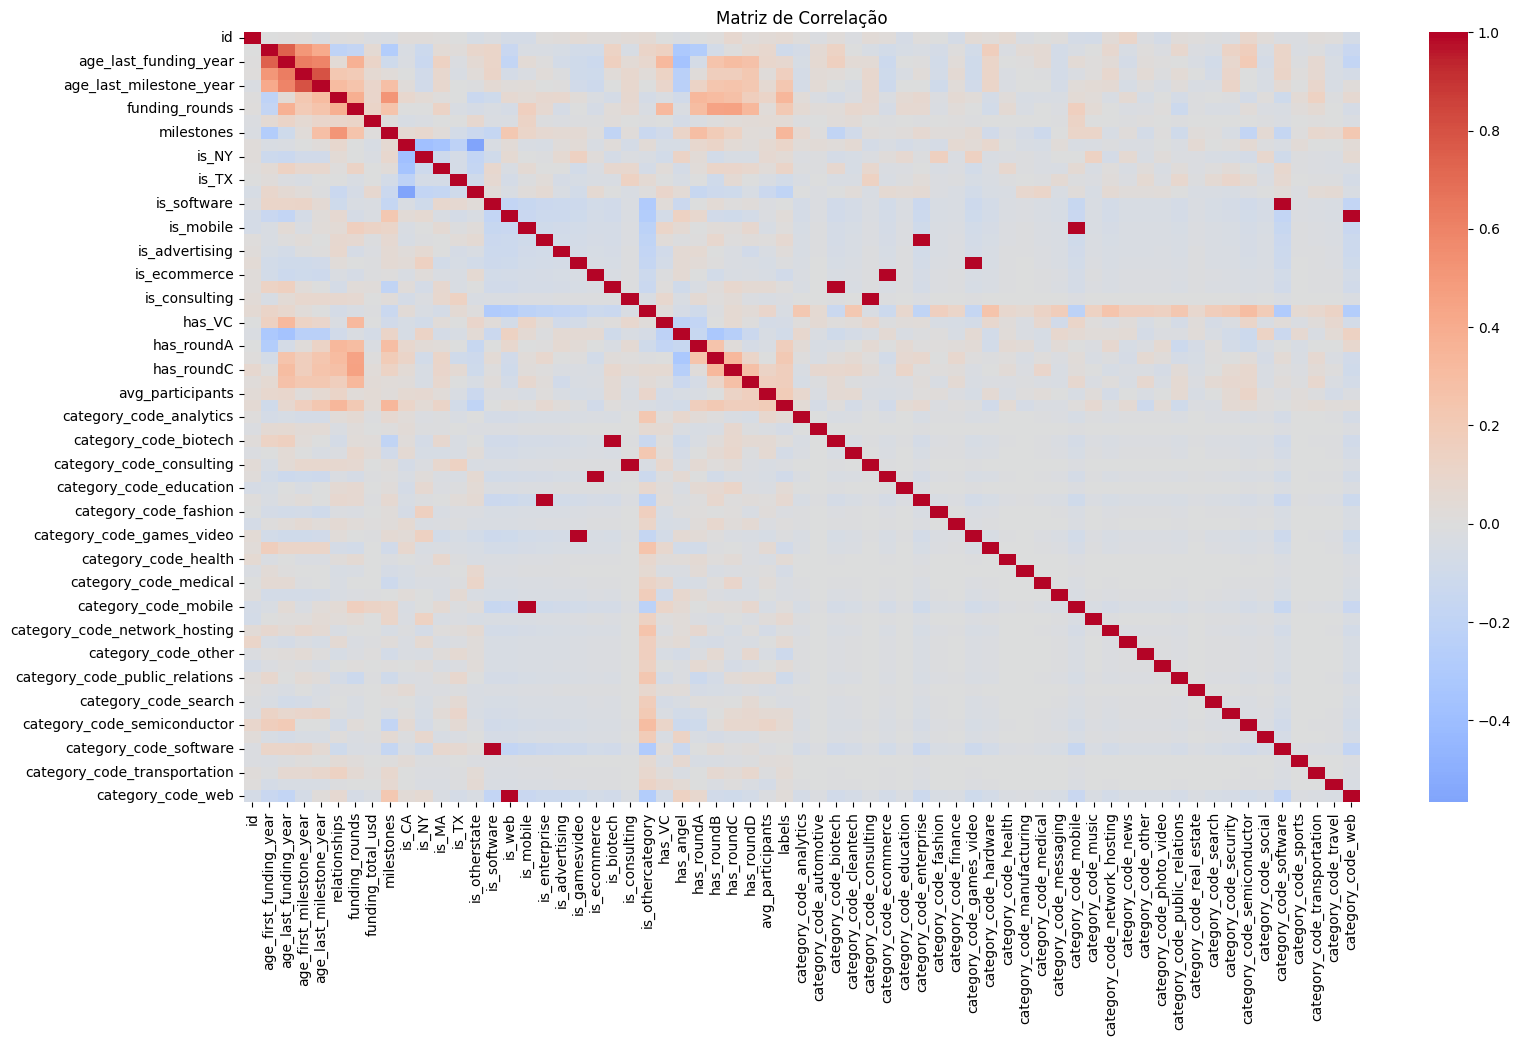

In [ ]:
corr = train_clean.corr(numeric_only=True)
plt.figure(figsize=(18,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação")
plt.show()

Por meio desta matriz de correlação acima, podemos observar correlações pontuais de modo geral entre as variáveis e onde elas se intensificam.

Analisando a realação entre algumas colunas numéricas e a coluna álvo:

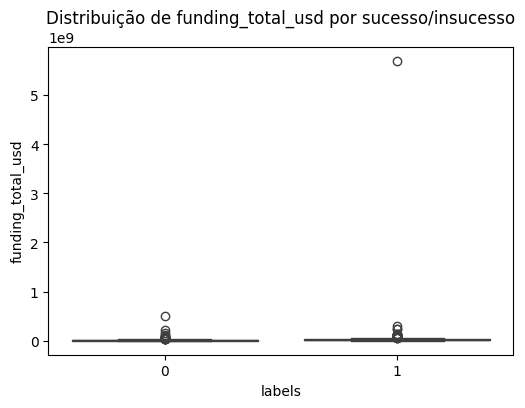

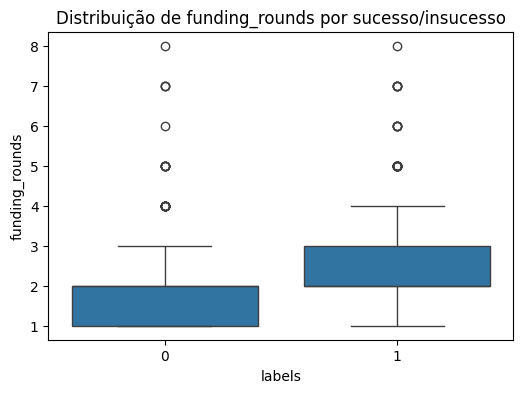

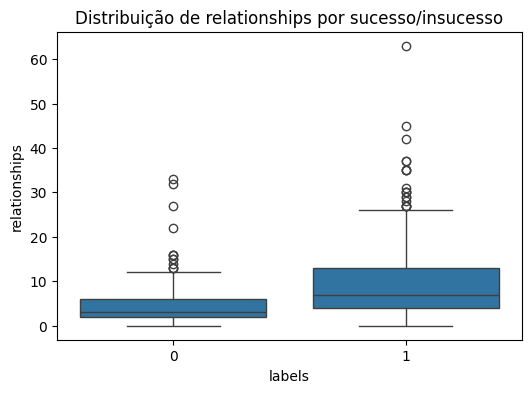

In [ ]:
for col in ["funding_total_usd", "funding_rounds", "relationships"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="labels", y=col, data=train_clean)
    plt.title(f"Distribuição de {col} por sucesso/insucesso")
    plt.show()

Observando a realação entre as startups e o sucesso/insucesso delas de acordo com a categorização de setor qual elas fazem parte:

In [325]:
for col in ["is_software", "is_web", "is_mobile", "is_enterprise", "is_advertising", "is_gamesvideo", "is_ecommerce", "is_biotech", "is_consulting", "is_othercategory"]:
    taxa_sucesso = train_clean.groupby(col)["labels"].mean()
    print(f"{col}:\n{taxa_sucesso*100}\n")


is_software:
is_software
0    64.879852
1    63.809524
Name: labels, dtype: float64

is_web:
is_web
0    64.116576
1    68.041237
Name: labels, dtype: float64

is_mobile:
is_mobile
0    64.543890
1    66.153846
Name: labels, dtype: float64

is_enterprise:
is_enterprise
0    63.743676
1    75.471698
Name: labels, dtype: float64

is_advertising:
is_advertising
0    64.392679
1    68.888889
Name: labels, dtype: float64

is_gamesvideo:
is_gamesvideo
0    64.860427
1    62.162162
Name: labels, dtype: float64

is_ecommerce:
is_ecommerce
0    65.495208
1    40.000000
Name: labels, dtype: float64

is_biotech:
is_biotech
0    64.573269
1    68.000000
Name: labels, dtype: float64

is_consulting:
is_consulting
0    64.751553
1    50.000000
Name: labels, dtype: float64

is_othercategory:
is_othercategory
0    65.924276
1    61.928934
Name: labels, dtype: float64



Para ficar melhor ilustrado houve a seguinte criação de histograma:

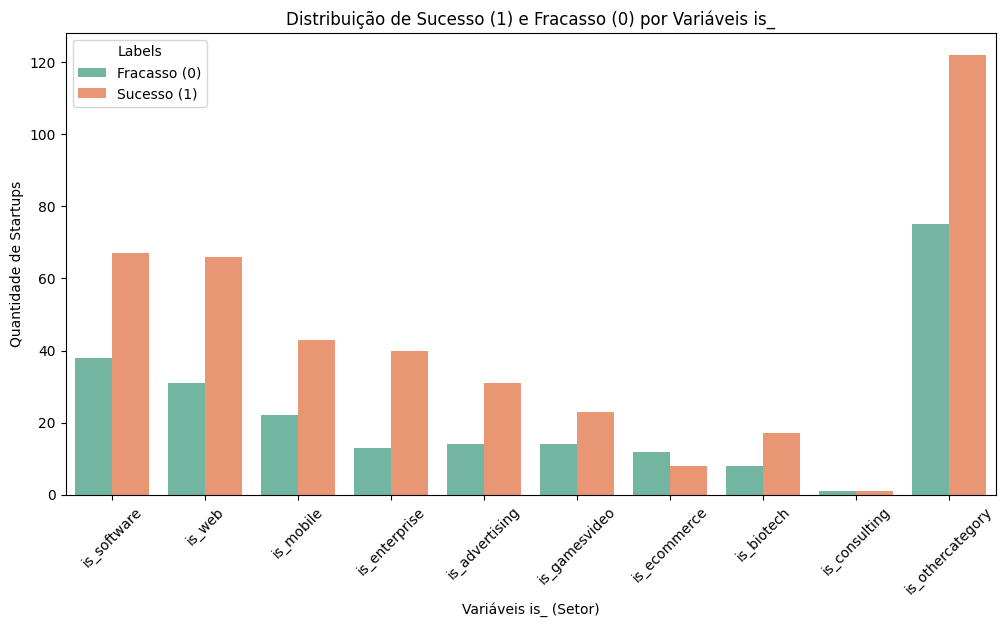

In [334]:
df_is = [ col for col in ["is_software", "is_web", "is_mobile", "is_enterprise", "is_advertising", "is_gamesvideo", "is_ecommerce", "is_biotech", "is_consulting", "is_othercategory"]]

df_is = train_clean.melt(id_vars="labels", value_vars=df_is,
                   var_name="Variavel", value_name="Presente")

# Considerar apenas onde a variável "is_" = 1 (startup pertence ao setor)
df_is = df_is[df_is["Presente"] == 1]

# Plotar histograma agrupado
plt.figure(figsize=(12,6))
sns.countplot(data=df_is, x="Variavel", hue="labels", palette="Set2")
plt.title("Distribuição de Sucesso (1) e Fracasso (0) por Variáveis is_")
plt.xlabel("Variáveis is_ (Setor)")
plt.ylabel("Quantidade de Startups")
plt.xticks(rotation=45)
plt.legend(title="Labels", labels=["Fracasso (0)", "Sucesso (1)"])
plt.show()

Verificando se realmente retiramos os dados NaN:


In [335]:
print(train_clean.isnull().sum())

id                              0
age_first_funding_year          0
age_last_funding_year           0
age_first_milestone_year        0
age_last_milestone_year         0
                               ..
category_code_software          0
category_code_sports            0
category_code_transportation    0
category_code_travel            0
category_code_web               0
Length: 65, dtype: int64


Conclusão: sim, conseguimos retirar todos os dados NaN do datframe.

### Realizando o levantamento de hipóteses:

#### Hipótese 1

A primeira hipótese se trata do que pode ser observado ao gerar o gráfico boxplot sobre a coluna de relationships e a coluna labels (sucesso/insucesso). Dessa forma concluímos que:

H0 (nula): Os relacionamentos não influenciam no sucesso da startup

H1 (alternativa): Os relacionamentos influenciam sim no sucesso da startup

Dessa forma, podemos realizar uma análise mais aprofundada por meio do seguinte código que gera o gráfico de boxplot:

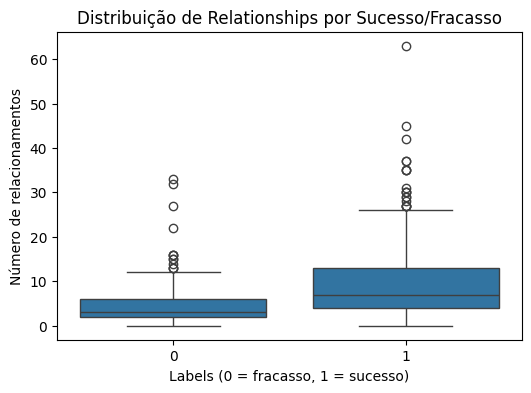

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="labels", y="relationships", data=train_clean)
plt.title("Distribuição de Relationships por Sucesso/Fracasso")
plt.xlabel("Labels (0 = fracasso, 1 = sucesso)")
plt.ylabel("Número de relacionamentos")
plt.show()

Assim podemos observar que, apesar de ter casos que podem ser considerados "outliners" dentro da situação de fracasso/insucesso, podemos observar que as startups que possuem mais relacionamentos tendenciam ao sucesso neste dataframe. Portanto, podemos afirmar que não reijeitamos H0 porque não há evisências suficiêntes para conformar que o número de relacionamentos influencia diretamente na taxa de sucesso e insucesso da startup.

#### Hipótese 2

A segunda hipótese se trata da taxa de sucesso das startups da área de tecnologia tendem a apresentar maior taxa de sucesso em comparação as startups de outras áreas. Sendo assim, a composição da hipótese é:

H0 (nula): Não há diferença significativa na taxa de sucesso entre startups de tecnologia e de outros setores.

H1 (alternativa): Startups de tecnologia têm maior taxa de sucesso que startups de outros setores.

Podemos observar isto no histograma que foi gerado na seção de limpeza e exploração dos dados, mas também pode ser observado nesta seção da seguinte forma:

In [340]:
# Separando colunas que começam com "is_"
df_is = [ col for col in ["is_software", "is_web", "is_mobile", "is_enterprise", "is_advertising", "is_gamesvideo", "is_ecommerce", "is_biotech", "is_consulting", "is_othercategory"]]

In [341]:
# Criando dataset para relacionar a variável target (labels) com cada coluna "is_"
df_is = train_clean.melt(id_vars="labels", value_vars=df_is, var_name="Variavel", value_name="Presente")

# Considerando resultados apenas onde a variável da coluna "is_" é igual a 1 (startup pertence ao setor)
df_is = df_is[df_is["Presente"] == 1]

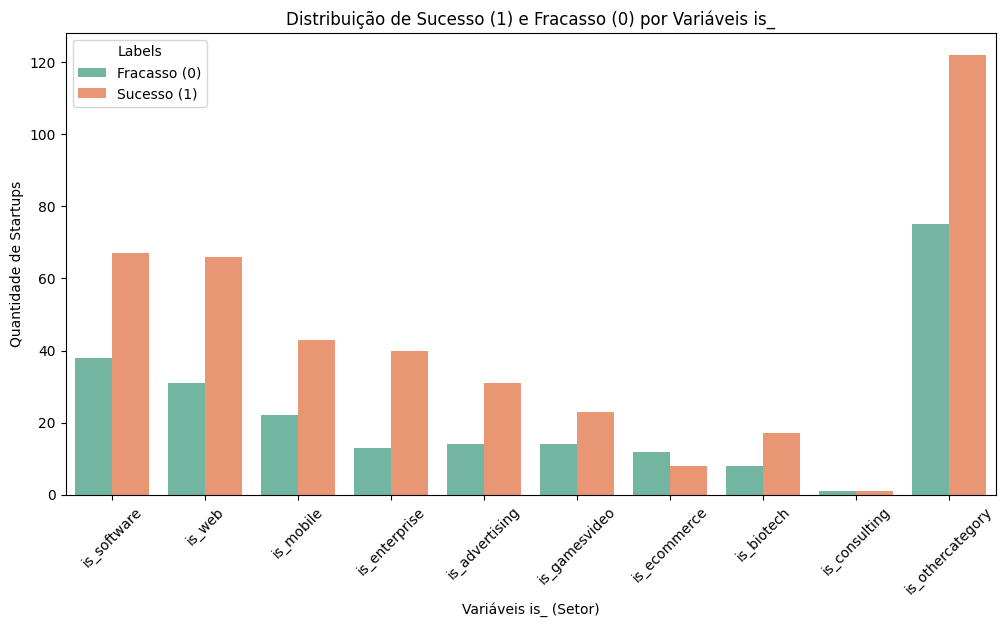

In [342]:
#Histograma
plt.figure(figsize=(12,6))
sns.countplot(data=df_is, x="Variavel", hue="labels", palette="Set2")
plt.title("Distribuição de Sucesso (1) e Fracasso (0) por Variáveis is_")
plt.xlabel("Variáveis is_ (Setor)")
plt.ylabel("Quantidade de Startups")
plt.xticks(rotation=45)
plt.legend(title="Labels", labels=["Fracasso (0)", "Sucesso (1)"])
plt.show()

Para melhor observação, trouxe uma validação que reúne apenas os dados das startups da área de tecnologia:

In [343]:
train_clean["is_tech"] = train_clean[["is_software","is_web","is_mobile","is_enterprise"]].max(axis=1)
taxa_sucesso_tech = train_clean.loc[train_clean["is_tech"]==1, "labels"].mean()
taxa_sucesso_outros = train_clean.loc[train_clean["is_tech"]==0, "labels"].mean()

print("Taxa de sucesso - Tecnologia:", taxa_sucesso_tech*100,"%")
print("Taxa de sucesso - Outros setores:", taxa_sucesso_outros*100,"%")

Taxa de sucesso - Tecnologia: 67.5 %
Taxa de sucesso - Outros setores: 61.963190184049076 %


Dessa forma, podemos concluir que uma porcentagem consideravelmente maior das startups de setor de tecnologia obtiveram sucesso, passando pelas quatro rodadas. Enquanto os demais setores obtiveram uma porcentagem consideravelmente menor de sucesso em comparação ao de tecnologia.

#### Hipótese 3

A terceira hipótese norteadora se trata da ideia de que apenas as startups que possuem uma média alta de investidores durantes as rodadas, conseguiram obter sucesso ao final da análise. Desta forma a hipótese fica desenvolvida assim:

H0 (nula): A quantidade média de investidores durante as rodadas não influenciam o resultado final da análise (sucesso/insucesso).
H1 (alternativa): Se uma startup possui uma média alta de investidores durante a rodada, ela tem mais chances de sucesso.

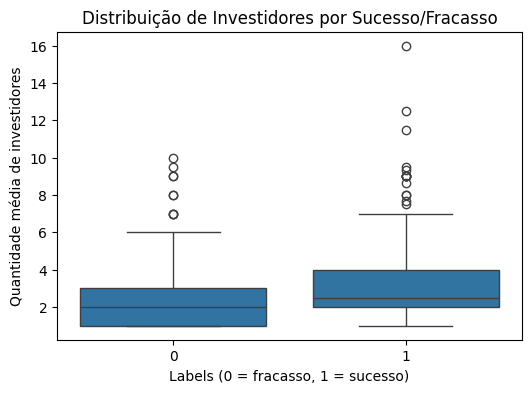

In [344]:
plt.figure(figsize=(6,4))
sns.boxplot(x="labels", y="avg_participants", data=train_clean)
plt.title("Distribuição de Investidores por Sucesso/Fracasso")
plt.xlabel("Labels (0 = fracasso, 1 = sucesso)")
plt.ylabel("Quantidade média de investidores")
plt.show()

Desse modo, podemos observar que grande parte as startups obtiveram sucesso tendo maior número de investidores, enquanto as demais startups não.

# Segunda etapa: Seleção de features

Separando os dados de treino train_clean para o treinamento do modelo e utilizando o dataframe de teste df_test para predição.

##### Seleção de Features por Correlação

Nesta subceção, vamos analisar a correlação de cada feature (clunas do dataframe) com a variável alvo (labels) para identificar as features mais relevantes.

In [347]:
# Calculando a correlação das features com a variável alvo (labels)
correlation_with_target = train_clean.corr(numeric_only=True)['labels'].sort_values(ascending=False)

print("Correlação das features com 'labels':")
print(correlation_with_target)

Correlação das features com 'labels':
labels                            1.000000
relationships                     0.342841
milestones                        0.335149
age_last_milestone_year           0.234071
has_roundB                        0.214299
                                    ...   
is_ecommerce                     -0.092407
age_first_funding_year           -0.098167
category_code_public_relations   -0.101218
category_code_other              -0.110428
is_otherstate                    -0.198638
Name: labels, Length: 66, dtype: float64


Realizando a selação das features com base no limite de correlação entre elas e a variável alvo.

In [349]:
correlation_threshold = 0.15 # limite de correlação

# Selecionando features com correlação absoluta maior que o limite
relevant_features = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index.tolist()

In [350]:
# Verificando e removendo a variável alvo da lista de features relevantes, caso esteja presente
if 'labels' in relevant_features:
    relevant_features.remove('labels')

# Filtrando features relevantes para incluir apenas colunas presentes em X_train
relevant_features = [feature for feature in relevant_features if feature in X_train.columns]

print(f"Features com correlação absoluta maior que {correlation_threshold} com 'labels' (presentes em X_train):")
print(relevant_features)

Features com correlação absoluta maior que 0.15 com 'labels' (presentes em X_train):
['relationships', 'milestones', 'age_last_milestone_year', 'has_roundB', 'funding_rounds', 'avg_participants', 'has_roundC', 'has_roundA', 'has_roundD', 'age_first_milestone_year', 'is_otherstate']


In [352]:
# Criando dataframes com apenas as features selecionadas
X_train_selected = X_train[relevant_features]

# Certificando-se que o df_test tem as mesmas colunas que o X_train_selected
X_test_selected = X_test.reindex(columns=X_train_selected.columns, fill_value=0)


print("\nTamanho do X_train_selected:", X_train_selected.shape)
print("Tamanho do X_test_selected:", X_test_selected.shape)


Tamanho do X_train_selected: (646, 11)
Tamanho do X_test_selected: (277, 11)


A seleção de features é o processo de obtenção de um subconjunto de dados com base no conjunto original ou pelo menos a versão mais atualizada do mesmo. É por meio desta estapa que selecionamos as features mais relevantes para treinamento e teste do modelo preditivo. Com base na análise exploratória dos dados, foi possível realizar a seleção de algumas features que se mostraram relevantes para o treinamento e teste dos modelos preditivos. Estas features são:  



*   id
*   age_first_funding_year'
*   age_last_funding_year'
*   age_first_milestone_year
*   age_last_milestone_year
*   relationships
*   funding_rounds
*   milestones
*   is_CA
*   is_NY
*   is_MA
*   is_TX
*   is_otherstate
*   is_software
*   is_web
*   is_mobile
*   is_enterprise
*   is_advertising
*   is_gamesvideo
*   is_ecommerce
*   is_biotech
*   is_consulting
*   is_othercategory
*   has_VC
*   has_angel
*   has_roundA
*   has_roundB
*   has_roundC
*   has_roundD
*   avg_participants
*   category_code_analytics
*   category_code_automotive
*   category_code_biotech
*   category_code_cleantech
*   category_code_consulting
*   category_code_ecommerce
*   category_code_education
*   category_code_enterprise
*   category_code_fashion
*   category_code_finance
*   category_code_games_video
*   category_code_hardware
*   category_code_health
*   category_code_manufacturing
*   category_code_medical
*   category_code_messaging
*   category_code_mobile
*   category_code_music
*   category_code_network_hosting
*   category_code_news
*   category_code_other
*   category_code_photo_video
*   category_code_public_relations
*   category_code_real_estate
*   category_code_search
*   category_code_security
*   category_code_semiconductor
*   category_code_social
*   category_code_software
*   category_code_sports
*   category_code_transportation
*   category_code_travel
*   category_code_web
*   labels



As colunas que não serão utilizadas para treino do modelo serão:

* funding_total_usd: por ter sido identificado números consideravelmente pequenos que poderiam enviesar os modelos treinados.

* is_tech: foi criada apenas para validar a quantidade de startups tech que obtiveram sucesso segundo o dataframe.

Por conta disso, essas colunas serão deletadas do dataframe de treino por meio do seguinte código:

In [354]:
final_train = train_clean.drop(columns=["funding_total_usd", "is_tech"])

# Terceira etapa: Treinamento do modelo

Para realizar o treinamento, primeiro foram escolhidos dois modelos preditivos de classificação supervisionada:

* Random Forest Classifier
* Logistic Regression

Utilizaremos as seguintes sub bibliotecas dentro da biblioteca scikit-learn:

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

### Modelo Random Forest

Primeiro nós separamos os conjuntos de features escolhidas para a realização do treino e do teste:

In [ ]:
X_train = X_train_selected
X_test = X_test_selected

Verificando e removendo linhas duplicadas dos dataframes de treino e teste:

In [356]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

print(f"Número de linhas no df_train após remover duplicados: {df_train.shape[0]}")
print(f"Número de linhas no df_test após remover duplicados: {df_test.shape[0]}")

Número de linhas no df_train após remover duplicados: 646
Número de linhas no df_test após remover duplicados: 277


Agora podemos iniciar o treinamento do modelo Random Forest por meio da utilização dos parâmetros:

In [359]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

Iniciando o treinamento do modelo:

In [361]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [362]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}
cv_results = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring)

Exibindo resultado dos testes de métricas:

In [363]:
print("Desempenho médio com validação cruzada (utilizando 5 folds):")
print(f"Acurácia média:  {cv_results['test_accuracy'].mean():.4f}")
print(f"Precisão média: {cv_results['test_precision'].mean():.4f}")
print(f"Recall médio:   {cv_results['test_recall'].mean():.4f}")

Desempenho médio com validação cruzada (utilizando 5 folds):
Acurácia média:  0.7569
Precisão média: 0.7753
Recall médio:   0.8829


Realizando teste do modelo:

In [364]:
y_pred = rf.predict(X_test)

Analisando as predições para este modelo

In [365]:
pred_test = rf.predict(X_test)

predictions = pd.DataFrame({
    "id": X_test.index,
    "labels": pred_test
})

print("\nVisualização das primeiras previsões no df_test:")
print(predictions.head())


Visualização das primeiras previsões no df_test:
   id  labels
0   0       1
1   1       0
2   2       1
3   3       1
4   4       1


### Modelo Logistic Regression



Seguindo a separação que realizamos para o treinamento do modelo Random Forest, nós a utilizaremos também para treinar o modelo de regressão logistica.

In [366]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, solver='liblinear')

# Validação cruzada utilizando k-fold
cv_results_lr = cross_validate(lr, X_train, y_train, cv=5, scoring=scoring)

Exibindo teste de métricas do modelo:

In [369]:
# Exibindo resultados médios das métricas
print("Desempenho médio do modelo Logistic Regression com validação cruzada (5 folds):")
print(f"Acurácia média:  {cv_results_lr['test_accuracy'].mean():.4f}")
print(f"Precisão média: {cv_results_lr['test_precision'].mean():.4f}")
print(f"Recall médio:   {cv_results_lr['test_recall'].mean():.4f}")

Desempenho médio do modelo Logistic Regression com validação cruzada (5 folds):
Acurácia média:  0.6919
Precisão média: 0.8099
Recall médio:   0.6867


## Tuning de Hiperparâmetros

Adicionandos o tunning de hiperparâmetros para a otimização dos modelos de Random Forest e Logistic Regression.

Testando o hiperparâmetro de grid search para ambos os modelos:

In [372]:
# utilizando grid search no modelo RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced']
}

# utilizando grid search no modelo de LogisticRegression
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'class_weight': ['balanced']
}

Ambos os modelos apresentaram melhora no desempenho ao passarem pelo GridSearchCV, portanto ele será implementado em ambos durante a próxima seção:

## Ajuste fino de hiperparâmetros

Implementando o GridSearchCV no modelo Random Forest

In [373]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring=scoring, refit='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=300,
                                              random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200, 300]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [375]:
print("Melhores parametros para o modelo RandomForestClassifier:")
print(grid_search_rf.best_params_)

Melhores parametros para o modelo RandomForestClassifier:
{'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 100}


Implementando GridSearchCV no modelo de Regressão Logística

In [376]:
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring=scoring, refit='accuracy')
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.1, 1.0, 10.0], 'class_weight': ['balanced']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [377]:
print("\nBest parameters for LogisticRegression:")
print(grid_search_lr.best_params_)


Best parameters for LogisticRegression:
{'C': 0.1, 'class_weight': 'balanced'}


### Avaliando o desempenho dos modelos otimizados

Primeiro iremos avaliar o desempenho pós otimização do modelo RandomForestClasssifier.

In [378]:
best_rf = grid_search_rf.best_estimator_
cv_results_best_rf = cross_validate(best_rf, X_train, y_train, cv=5, scoring=scoring)

print("Desempenho médio do melhor modelo Random Forest com validação cruzada (5 folds):")
print(f"Acurácia média:  {cv_results_best_rf['test_accuracy'].mean():.4f}")
print(f"Precisão média: {cv_results_best_rf['test_precision'].mean():.4f}")
print(f"Recall médio:   {cv_results_best_rf['test_recall'].mean():.4f}")

Desempenho médio do melhor modelo Random Forest com validação cruzada (5 folds):
Acurácia média:  0.7662
Precisão média: 0.7829
Recall médio:   0.8877


Agora nós iremos verificar o desepenho pós otimização do modelo Logistic Regression.

In [379]:
best_lr = grid_search_lr.best_estimator_
cv_results_best_lr = cross_validate(best_lr, X_train, y_train, cv=5, scoring=scoring)

print("\nDesempenho médio do melhor modelo Logistic Regression com validação cruzada (5 folds):")
print(f"Acurácia média:  {cv_results_best_lr['test_accuracy'].mean():.4f}")
print(f"Precisão média: {cv_results_best_lr['test_precision'].mean():.4f}")
print(f"Recall médio:   {cv_results_best_lr['test_recall'].mean():.4f}")


Desempenho médio do melhor modelo Logistic Regression com validação cruzada (5 folds):
Acurácia média:  0.7043
Precisão média: 0.8113
Recall médio:   0.7106


Podemos observar que houve uma melhora significativa de ambos os modelos considerando o antes da otimização e o pós.

#### Verificando critério de acurácia

Os códigos desta seção tem como objetivo determinar se algum dos modelos otimizados atinge o critério de acurácia mínima de 80% requerido na ponderada.


Primeiro realizamos o teste de acurácia nos dois modelos para verificar qual deles obtém o melhor desempenho.

In [381]:
# Random Forest model
acuracia_rf = cv_results_best_rf['test_accuracy'].mean()

# Logistic Regression
acuracia_lr = cv_results_best_lr['test_accuracy'].mean()

Comparando verificando qual deles chega mais próximo de atender ao critério de acurácia mínima de 80%.

In [382]:
criterio = 0.80

Realizando a comparação entre os modelos.

In [385]:
# Random Forest model
acuracia_rf = cv_results_best_rf['test_accuracy'].mean()

# Logistic Regression
acuracia_lr = cv_results_best_lr['test_accuracy'].mean()

print("Comparação dos modelos com base no critério de 80%:")
if acuracia_rf >= criterio and acuracia_lr >= criterio:
    print(f"Ambos os modelos apresentam um desempenho de acurácia igual ou acima 80%.")
elif acuracia_rf >= criterio:
    print(f"O modelo RandomForest apresentou uma acurácia de {acuracia_rf:.4f}, que é de 80% ou maior.")
    print(f"O modelo Logistic Regression apresentou uma acurácia de {acuracia_lr:.4f}, que é bem menor o modelo RandomForest.")
elif acuracia_lr >= criterio:
    print(f"O modelo Logistic Regression apresentou uma acurácia de {acuracia_lr:.4f}, que é de 80% ou maior.")
    print(f"O modelo RandomForest apresentou uma acurácia de {acuracia_rf:.4f}, que é bem menor o modelo RandomForest.")
else:
    print(f"Nem o RandomForest ({acuracia_rf:.4f}) ou o Logistic Regression ({acuracia_lr:.4f}) atingiram uma porcentagem de 80% ou maior.")

Comparação dos modelos com base no critério de 80%:
Nem o RandomForest (0.7662) ou o Logistic Regression (0.7043) atingiram uma porcentagem de 80% ou maior.


### Predição com o melhor modelo

Nesta seção utilizaremos o modelo que obteve melhor desempenho segundo a avaliação da seção anterior, por meio da determinação de qual modelo obtve melhor performace.


In [386]:
# Determinando melhor modelo com base no resultado da acurácia
if acuracia_rf >= acuracia_lr:
    melhor_modelo = best_rf
    print("O Random Forest é o melhor modelo com base na acurácia obtida.")
else:
    melhor_modelo = best_lr
    print("O Logistic Regression é o melhor modelo com base na acurácia obtida.")

# realizando predições com o melhor modelo
test_predictions = melhor_modelo.predict(X_test_selected)

O Random Forest é o melhor modelo com base na acurácia obtida.


Salvando predições para realizar o teste na plataforma Kaggle.

In [387]:
predictions_df = pd.DataFrame({
    "id": original_test_ids,
    "labels": test_predictions
})
predictions_df.to_csv("predictions.csv", index=False)